In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/online_food_delivery_cleaned.csv")


In [3]:
top_customers = (
    df.groupby("Customer_ID")["Final_Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


Customer_ID
CUST4431    52418.0
CUST3471    50989.0
CUST1606    49456.0
CUST8797    47689.0
CUST6252    47495.0
CUST1968    47034.0
CUST9591    46762.0
CUST2910    46190.0
CUST6457    46032.0
CUST1239    45196.0
Name: Final_Amount, dtype: float64

In [4]:
bins = [18, 25, 35, 45, 55, 65]
labels = ["18–25", "26–35", "36–45", "46–55", "56+"]

df["Age_Group"] = pd.cut(df["Customer_Age"], bins=bins, labels=labels)

age_order_value = df.groupby("Age_Group")["Order_Value"].mean()
age_order_value


C:\Users\HP\AppData\Local\Temp\ipykernel_15488\39851541.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_order_value = df.groupby("Age_Group")["Order_Value"].mean()


Age_Group
18–25    2064.048682
26–35    2102.930885
36–45    2079.614286
46–55    2105.718674
56+      2025.347208
Name: Order_Value, dtype: float64

In [5]:
df["Order_Day"].value_counts()


Order_Day
Weekday    71370
Weekend    28630
Name: count, dtype: int64

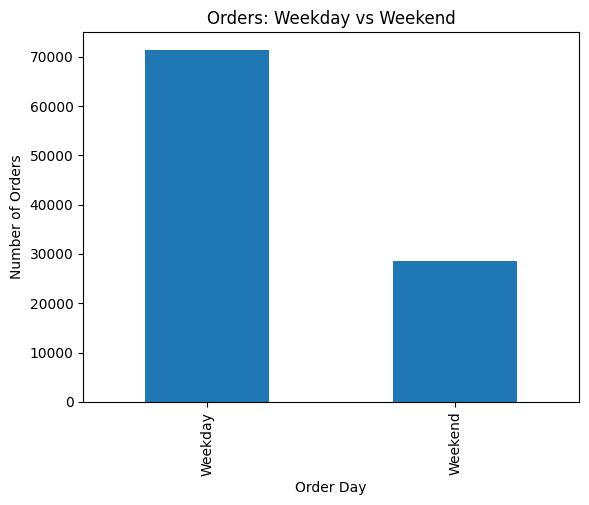

In [7]:
df["Order_Day"].value_counts().plot(kind="bar")
plt.title("Orders: Weekday vs Weekend")
plt.xlabel("Order Day")
plt.ylabel("Number of Orders")
plt.show()


In [9]:
df["Order_Date"] = pd.to_datetime(
    df["Order_Date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)


In [10]:
df["Order_Date"].isna().sum()


np.int64(0)

In [11]:
monthly_revenue = (
    df.groupby(df["Order_Date"].dt.to_period("M"))["Final_Amount"]
    .sum()
)

monthly_revenue


Order_Date
2024-01    16008227.0
2024-02    15350442.0
2024-03    15891011.0
2024-04    15466743.0
2024-05    15860508.0
2024-06    15453157.0
2024-07    17914305.0
2024-08    16023871.0
2024-09    15269776.0
2024-10    15678556.0
2024-11    15387419.0
2024-12    15244098.0
Freq: M, Name: Final_Amount, dtype: float64

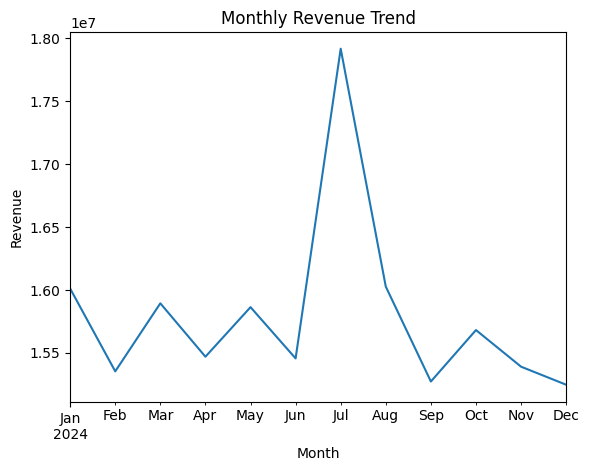

In [12]:
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [13]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

monthly_revenue = (
    df.groupby(df["Order_Date"].dt.to_period("M"))["Final_Amount"]
    .sum()
)

monthly_revenue


Order_Date
2024-01    16008227.0
2024-02    15350442.0
2024-03    15891011.0
2024-04    15466743.0
2024-05    15860508.0
2024-06    15453157.0
2024-07    17914305.0
2024-08    16023871.0
2024-09    15269776.0
2024-10    15678556.0
2024-11    15387419.0
2024-12    15244098.0
Freq: M, Name: Final_Amount, dtype: float64

In [14]:
df["Order_Date"] = pd.to_datetime(
    df["Order_Date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)


In [15]:
monthly_revenue = (
    df.groupby(df["Order_Date"].dt.to_period("M"))["Final_Amount"]
    .sum()
)

monthly_revenue


Order_Date
2024-01    16008227.0
2024-02    15350442.0
2024-03    15891011.0
2024-04    15466743.0
2024-05    15860508.0
2024-06    15453157.0
2024-07    17914305.0
2024-08    16023871.0
2024-09    15269776.0
2024-10    15678556.0
2024-11    15387419.0
2024-12    15244098.0
Freq: M, Name: Final_Amount, dtype: float64

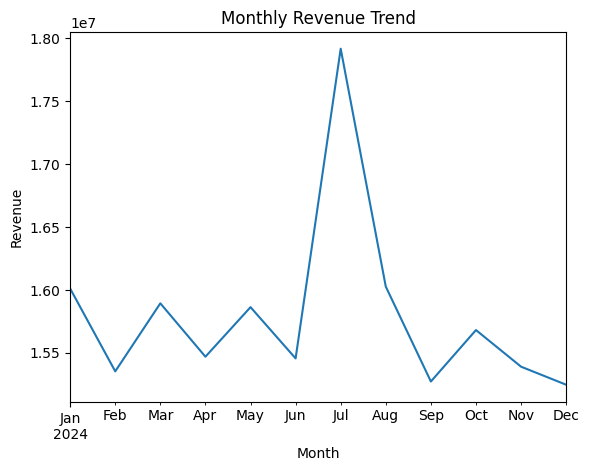

In [16]:
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()
